# ASSIGNMENT 1 (adapted from https://bit.ly/2J7G9f8)

## PROBLEM:

### Context

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

Submissions in this challenge will take the form of Python data analysis.

Kiva has provided a dataset of loans issued over the 2016-2018 time period, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.


### Problem statement

For the locations in which Kiva has active loans, the objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

### Personal disclaimer

From a research perspective, the results obtained are never going to be a full representation of the realities that borrowers experience. It is meant to spark a discussion around how we can identify the welfare level of borrowers and improve them where we can.

## SOLUTION:

### Python Packages

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Data
*Here we upload all the Python packages and datasets required for analysis*

#### 1. Original Data

In [2]:
# Original Data
loan_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//kiva_loans.csv')
location_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
loan_themes  = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//loan_theme_ids.csv')
regional_lts = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//loan_themes_by_region.csv')

##### Descriptions of the original datasets

There are four data sources provided by Kiva:

* ***loan_data***
   1. **id** - Unique ID for loan
   2. **funded_amount** - The amount disbursed by Kiva to the field agent(USD)
   3. **loan_amount** - The amount disbursed by the field agent to the borrower(USD)
   4. **activity** - More granular category
   5. **sector** - High level category
   6. **use** - Exact usage of loan amount
   7. **country_code** - ISO country code of country in which loan was disbursed
   8. **country** - Full country name of country in which loan was disbursed
   9. **region** - Full region name within the country
   10. **currency** - The currency in which the loan was disbursed
   11. **partner_id** - ID of partner organization
   12. **posted_time** - The time at which the loan is posted on Kiva by the field agent
   13. **disbursed_time** - The time at which the loan is disbursed by the field agent to the borrower
   14. **funded_time** - The time at which the loan posted to Kiva gets funded by lenders completely
   15. **term_in_months** - The duration for which the loan was disbursed in months
   16. **lender_count** - The total number of lenders that contributed to this loan
   17. **tags**
   18. **borrower_genders** - Comma separated M,F letters, where each instance represents a single male/female in the group
   19. **repayment_interval**
   20. **date**
   
####  

* ***location_data***
   1. **LocationName** - region, country
   2. **ISO** - some sort of unique abbreviation for country   
   3. **country** - country   
   4. **region** - region within country   
   5. **world_region** - parts of the world   
   6. **MPI** - multidimensional poverty index   
   7. **geo** - (latitude, longitude)
   8. **lat** - latitude   
   9. **lon** - longitude
   
####  

* ***loan_themes***
   1. **id** - Unique ID for loan (Loan ID)   
   2. **Loan Theme ID** - ID for Loan Theme   
   3. **Loan Theme Type** - Category name of type of loan   
   4. **Partner ID**
   
####  

* ***regional_lts***
   1. **Partner ID**   
   2. **Field Partner Name**
   3. **sector**
   4. **Loan Theme ID**
   5. **Loan Theme Type**  
   6. **country**   
   7. **forkiva**   
   8. **region**
   9. **geocode_old**   
   10. **ISO**   
   11. **number**
   12. **amount**
   13. **LocationName**
   14. **geocode**
   15. **names**
   16. **geo**
   17. **lat**
   18. **lon**
   19. **mpi_region**
   20. **mpi_geo**
   21. **rural_pct**




In [3]:
loan_data.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
location_data.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
loan_themes.head(5)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
regional_lts.head(5)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


#### 2. Supplementary Data

In this section, we aim to gather the following data from the World Bank:

1. [Per Capita Expenditure (PCE)](https://www.quora.com/What-does-per-capita-expenditure-mean?share=1) for each country - *this is the total market value of all purchases in a country divided by that country's total population* (data: https://bit.ly/3blw0be)
2. [Multidimensional poverty headcount ratio](https://duckduckgo.com/?t=ffab&q=headcount+ratio+meaning&ia=web) - *this is the proportion of a country's population that lives, below the poverty line.* (data: https://bit.ly/2VfM2hi)

In [7]:
# Per Capita Expenditure
PCE_data = pd.read_html('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//PCE data.html')
PCE_data = PCE_data[0]
PCE_data = pd.DataFrame(PCE_data)

# World Bank Gross data
db_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//Data_Extract_From_Poverty_and_Equity//806b9aec-08c0-45f0-8acc-e02a84ec7c9c_Data.csv')

In [8]:
PCE_data.head(5)

,Unnamed: 0,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 43
0,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,East Asia and Pacific,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,American Samoa,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,NaN
2,Cambodia,7.20,6.96,6.77,6.69,6.75,6.92,7.17,7.45,7.71,...,14.31,14.54,14.78,15.03,15.27,15.52,15.77,16.01,16.25,NaN
3,China,943.46,956.17,969.01,981.24,993.89,1008.63,1023.31,1036.83,1051.04,...,1337.71,1344.13,1350.70,1357.38,1364.27,1371.22,1378.67,1386.40,1392.73,NaN
4,Fiji,0.60,0.61,0.62,0.64,0.65,0.67,0.69,0.70,0.71,...,0.86,0.86,0.87,0.87,0.87,0.87,0.87,0.88,0.88,NaN


In [9]:
db_data.head(5)

,Series Name,Series Code,Country Name,Country Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Albania,ALB,..,..,..,..,..,..,...,..,..,1.1,..,1.9,1.3,1.1,1.7,..,..
2,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Algeria,DZA,..,..,..,..,..,..,...,..,0.5,..,..,..,..,..,..,..,..
3,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Angola,AGO,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,47.6,..
4,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,Argentina,ARG,..,..,..,..,..,..,...,2.2,0.9,0.8,0.7,0.7,..,0.7,0.5,1,..


In [10]:
db_data['Series Name'].unique()

array(['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Survey mean consumption or income per capita, total population (2011 PPP $ per day)',
       nan, 'Data from database: Poverty and Equity',
       'Last Updated: 03/18/2020'], dtype=object)

### Exploratory Data Analysis

#### Loan Amounts

1. How much of the loan has Kiva financed?

In [11]:
percentage1 = (loan_data.funded_amount.sum()/loan_data.loan_amount.sum())*100
percentage1 = round(percentage1, 2)
print('Kiva has financed '+str(percentage1)+"% of its borrowers' loans")

Kiva has financed 93.3% of its borrowers' loans


2. How much money have Kiva donors contributed over time?

In [12]:
# Convert datetime values to appropriate formats
loan_data['posted_time'] = loan_data['posted_time'].astype('datetime64')
loan_data['disbursed_time'] = loan_data['disbursed_time'].astype('datetime64')
loan_data['funded_time'] = loan_data['funded_time'].astype('datetime64')

# Pick out dates
loan_data.loc[:,'disbursement_date'] = loan_data['disbursed_time'].dt.date
loan_data['disbursement_date'] = loan_data['disbursement_date']

In [13]:
loan_data.dtypes

id                             int64
funded_amount                float64
loan_amount                  float64
activity                      object
sector                        object
use                           object
country_code                  object
country                       object
region                        object
currency                      object
partner_id                   float64
posted_time           datetime64[ns]
disbursed_time        datetime64[ns]
funded_time           datetime64[ns]
term_in_months               float64
lender_count                   int64
tags                          object
borrower_genders              object
repayment_interval            object
date                          object
disbursement_date             object
dtype: object

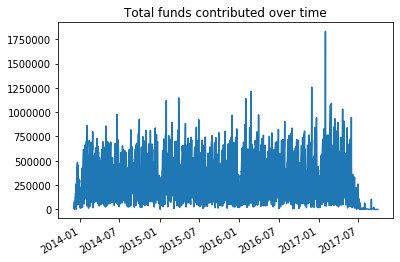

In [19]:
tab1 = pd.pivot_table(loan_data, values='funded_amount', index=['disbursement_date'], aggfunc='sum')

# plot this table
fig, ax = plt.subplots()
ax.plot(tab1.index, tab1['funded_amount'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# declare the title and show the completed graph
ax.set_title('Total funds contributed over time (USD)')
plt.show()

3. What is the most common amount that Kiva donors collectively give?

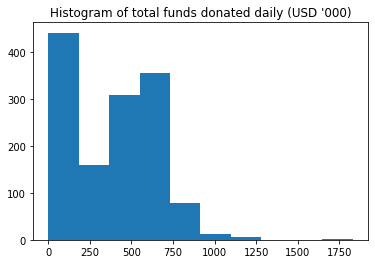

In [23]:
# plot daily amounts distribution
fig, ax = plt.subplots()

funded_amount_in_thousands = tab1['funded_amount']/1000
ax.hist(funded_amount_in_thousands)

ax.set_title("Histogram of total funds donated daily (USD '000)")
plt.show()

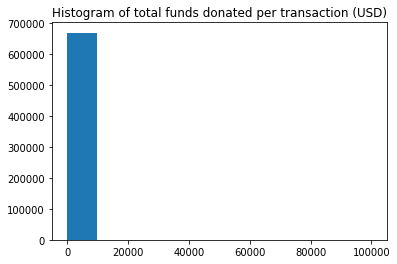

In [25]:
# plot all individual contributions
fig, ax = plt.subplots()

ax.hist(loan_data['funded_amount'])

ax.set_title("Histogram of total funds donated per transaction (USD)")
plt.show()

In [27]:
print(loan_data['funded_amount'].min())

0.0
